| **Chapter**               | 7: Temporal dynamics of epidemics                            |
|---------------------------|--------------------------------------------------------------|
| **Computational Note**    | 7.4: Time series decomposition                               |
|                           | 7.5: Plotting time series decompositions                     |
| **Package prerequisites** | [statsmodels](https://www.statsmodels.org/stable/index.html) |


# Time series decomposition of influenza incidence

In [1]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt, gridspec
import matplotlib
import seaborn as sns
import numpy as np
import os

sns.set_style("darkgrid")

In [2]:
%load_ext watermark
%watermark --iversions -v -a "Chris von Csefalvay" -gu "chrisvoncsefalvay"

Author: Chris von Csefalvay

Github username: chrisvoncsefalvay

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 8.4.0

pandas     : 1.4.2
seaborn    : 0.11.2
statsmodels: 0.13.2
matplotlib : 3.5.2
numpy      : 1.22.4



## Importing the Project Tycho data sets

In this example, we are using Project Tycho's API for programmatic access to epidemiological data. To access the API, you will need to follow three steps.

1. Create a [Project Tycho](https://www.tycho.pitt.edu/) account.
2. [Go to your profile](https://www.tycho.pitt.edu/accounts/profile/) and get your API key.
3. Set your API key as the environment variable `TYCHO_APIKEY` (`export TYCHO_APIKEY=abcd1234...`).

In [3]:
%env TYCHO_APIKEY fcfcc9fe5ddf0808caa6

env: TYCHO_APIKEY=fcfcc9fe5ddf0808caa6


In [4]:
flu_url = "https://www.tycho.pitt.edu/api/query?apikey=" + os.getenv("TYCHO_APIKEY") + "&ConditionName=Influenza&CountryName=UNITED STATES OF AMERICA&PeriodStartDate>=1930-01-01&PeriodEndDate<=1950-01-01".replace(" ", "%20")

flu_incidence = pd.read_csv(flu_url,
                            low_memory=False)[["PeriodEndDate", "CountValue"]].\
                                               groupby(["PeriodEndDate"]).\
                                               sum().\
                                               reset_index().\
                                               rename(columns={"PeriodEndDate": "Date", "CountValue": "Cases"})

In [5]:
flu_incidence.Date = pd.to_datetime(flu_incidence.Date)

In [6]:
flu_incidence.index = pd.DatetimeIndex(flu_incidence.Date)
cases = flu_incidence.drop("Date", axis=1)

## Seasonal decomposition

In [7]:
r = sm.tsa.seasonal_decompose(cases, period=52)

## Plotting results

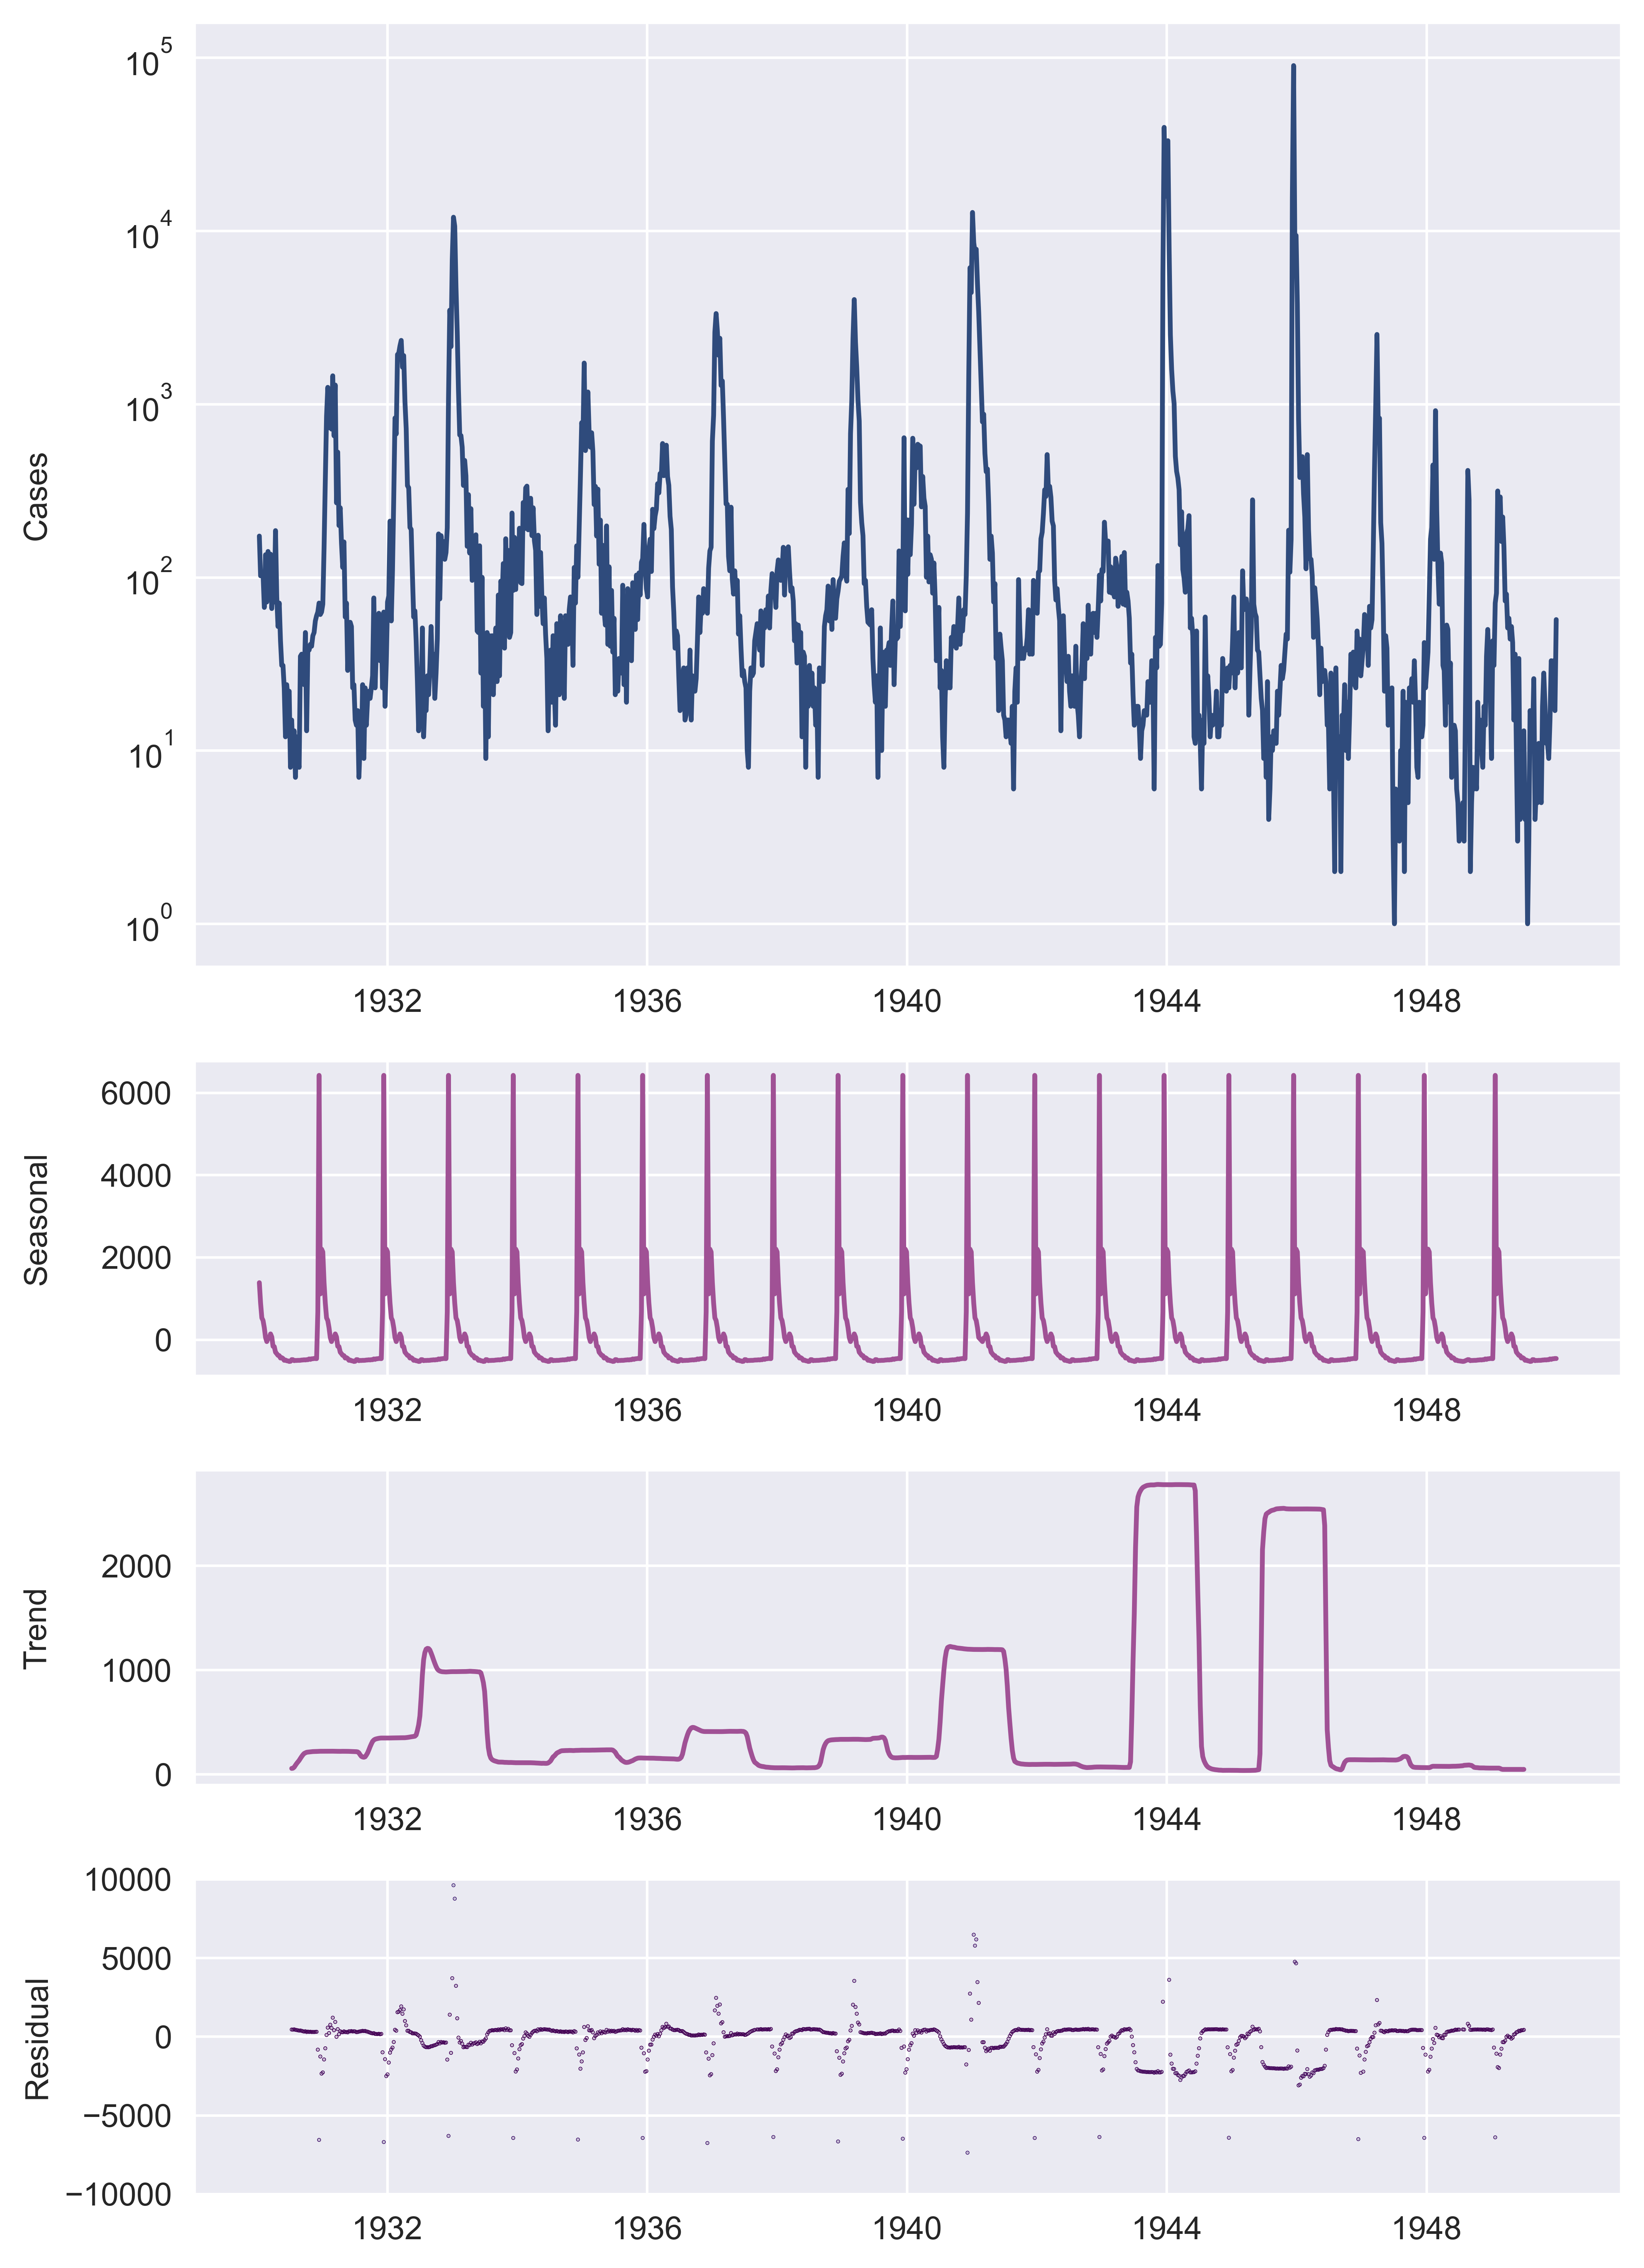

In [22]:
fig = plt.figure(figsize=(8, 12.5), dpi=600)

gs = gridspec.GridSpec(4, 1, height_ratios=[3,1,1,1])
gs.update(hspace=0.2)

ax1 = plt.subplot(gs[0])
ax1.plot(r.observed, color="#2f4b7c")
ax1.set_yscale("log")
ax1.set_ylabel("Cases")

ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.plot(r.seasonal, color="#a05195")
ax2.set_ylabel("Seasonal")

ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.plot(r.trend, color="#a05195")
ax3.set_ylabel("Trend")

ax4 = plt.subplot(gs[3], sharex=ax1)
ax4.scatter(r.resid.index, r.resid, s=0.05, c=np.abs(r.resid), cmap="viridis")
ax4.set_ylim(-1e4, 1e4)
ax4.set_ylabel("Residual")

fig.align_labels()
plt.savefig("flu_decomposition.pdf")